In [134]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

pd.set_option('display.max_rows', None)

df = pd.read_excel(r'C:\Users\mrthb\OneDrive\Desktop\adidasussales.xlsx')

print(df.to_string())

           Retailer  Retailer ID Invoice Date     Region           State            City                    Product  Price per Unit  Units Sold  Total Sales  Operating Profit  Operating Margin Sales Method
0       Foot Locker      1185732   2020-01-01  Northeast        New York        New York      Men's Street Footwear            50.0        1200     600000.0         300000.00              0.50     In-store
1       Foot Locker      1185732   2020-01-02  Northeast        New York        New York    Men's Athletic Footwear            50.0        1000     500000.0         150000.00              0.30     In-store
2       Foot Locker      1185732   2020-01-03  Northeast        New York        New York    Women's Street Footwear            40.0        1000     400000.0         140000.00              0.35     In-store
3       Foot Locker      1185732   2020-01-04  Northeast        New York        New York  Women's Athletic Footwear            45.0         850     382500.0         133875.00  

In [107]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


In [135]:
clean1_df = df.dropna()

print(clean1_df.to_string())

           Retailer  Retailer ID Invoice Date     Region           State            City                    Product  Price per Unit  Units Sold  Total Sales  Operating Profit  Operating Margin Sales Method
0       Foot Locker      1185732   2020-01-01  Northeast        New York        New York      Men's Street Footwear            50.0        1200     600000.0         300000.00              0.50     In-store
1       Foot Locker      1185732   2020-01-02  Northeast        New York        New York    Men's Athletic Footwear            50.0        1000     500000.0         150000.00              0.30     In-store
2       Foot Locker      1185732   2020-01-03  Northeast        New York        New York    Women's Street Footwear            40.0        1000     400000.0         140000.00              0.35     In-store
3       Foot Locker      1185732   2020-01-04  Northeast        New York        New York  Women's Athletic Footwear            45.0         850     382500.0         133875.00  

In [136]:
print(clean1_df.duplicated())

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

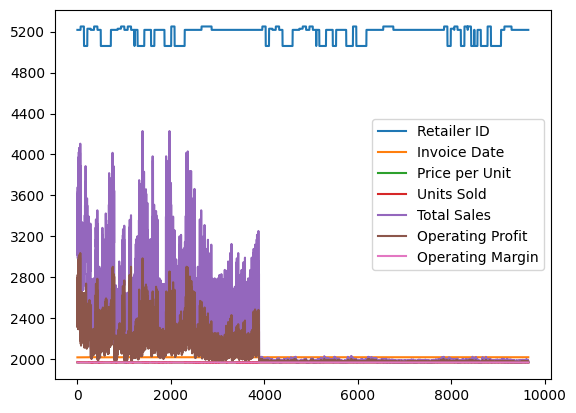

In [137]:
clean1_df.plot()
plt.show()

In [8]:
clean1_df.to_excel(r'C:\Users\mrthb\OneDrive\Desktop\cleanadidassales.xlsx', index=False)

In [138]:
filtered_df= clean1_df[clean1_df['Total Sales'] > 300000]

filtered_df = clean1_df[clean1_df['Total Sales'] > 300000]

# Sort by 'Total Sales' from highest to lowest
filtered_df = filtered_df.sort_values(by='Total Sales', ascending=False)

# Select only 'Retailer ID' and 'Total Sales' columns
result_df = filtered_df[['Retailer ID', 'Total Sales']]

# Display only the top 100 items
result_df = result_df.head(100)

# Print the result
print(result_df)


      Retailer ID  Total Sales
1394      1128299     825000.0
1970      1128299     825000.0
1971      1128299     810000.0
1395      1128299     810000.0
1401      1128299     807500.0
1977      1128299     807500.0
62        1185732     780000.0
36        1185732     765000.0
2361      1185732     752500.0
30        1185732     750000.0
42        1185732     750000.0
2331      1185732     747500.0
752       1185732     747500.0
56        1185732     747500.0
1610      1128299     735000.0
1898      1128299     735000.0
24        1185732     732000.0
758       1185732     731250.0
2337      1185732     731250.0
1899      1128299     722500.0
1611      1128299     722500.0
1617      1128299     720000.0
48        1185732     720000.0
1905      1128299     720000.0
1400      1128299     715000.0
1976      1128299     715000.0
41        1185732     715000.0
1396      1128299     712500.0
1972      1128299     712500.0
1402      1128299     701250.0
1978      1128299     701250.0
175     

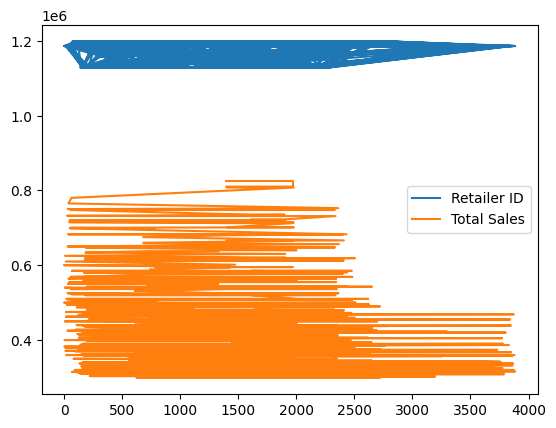

In [139]:
filtered_df[['Retailer ID', 'Total Sales']].plot()
plt.show()

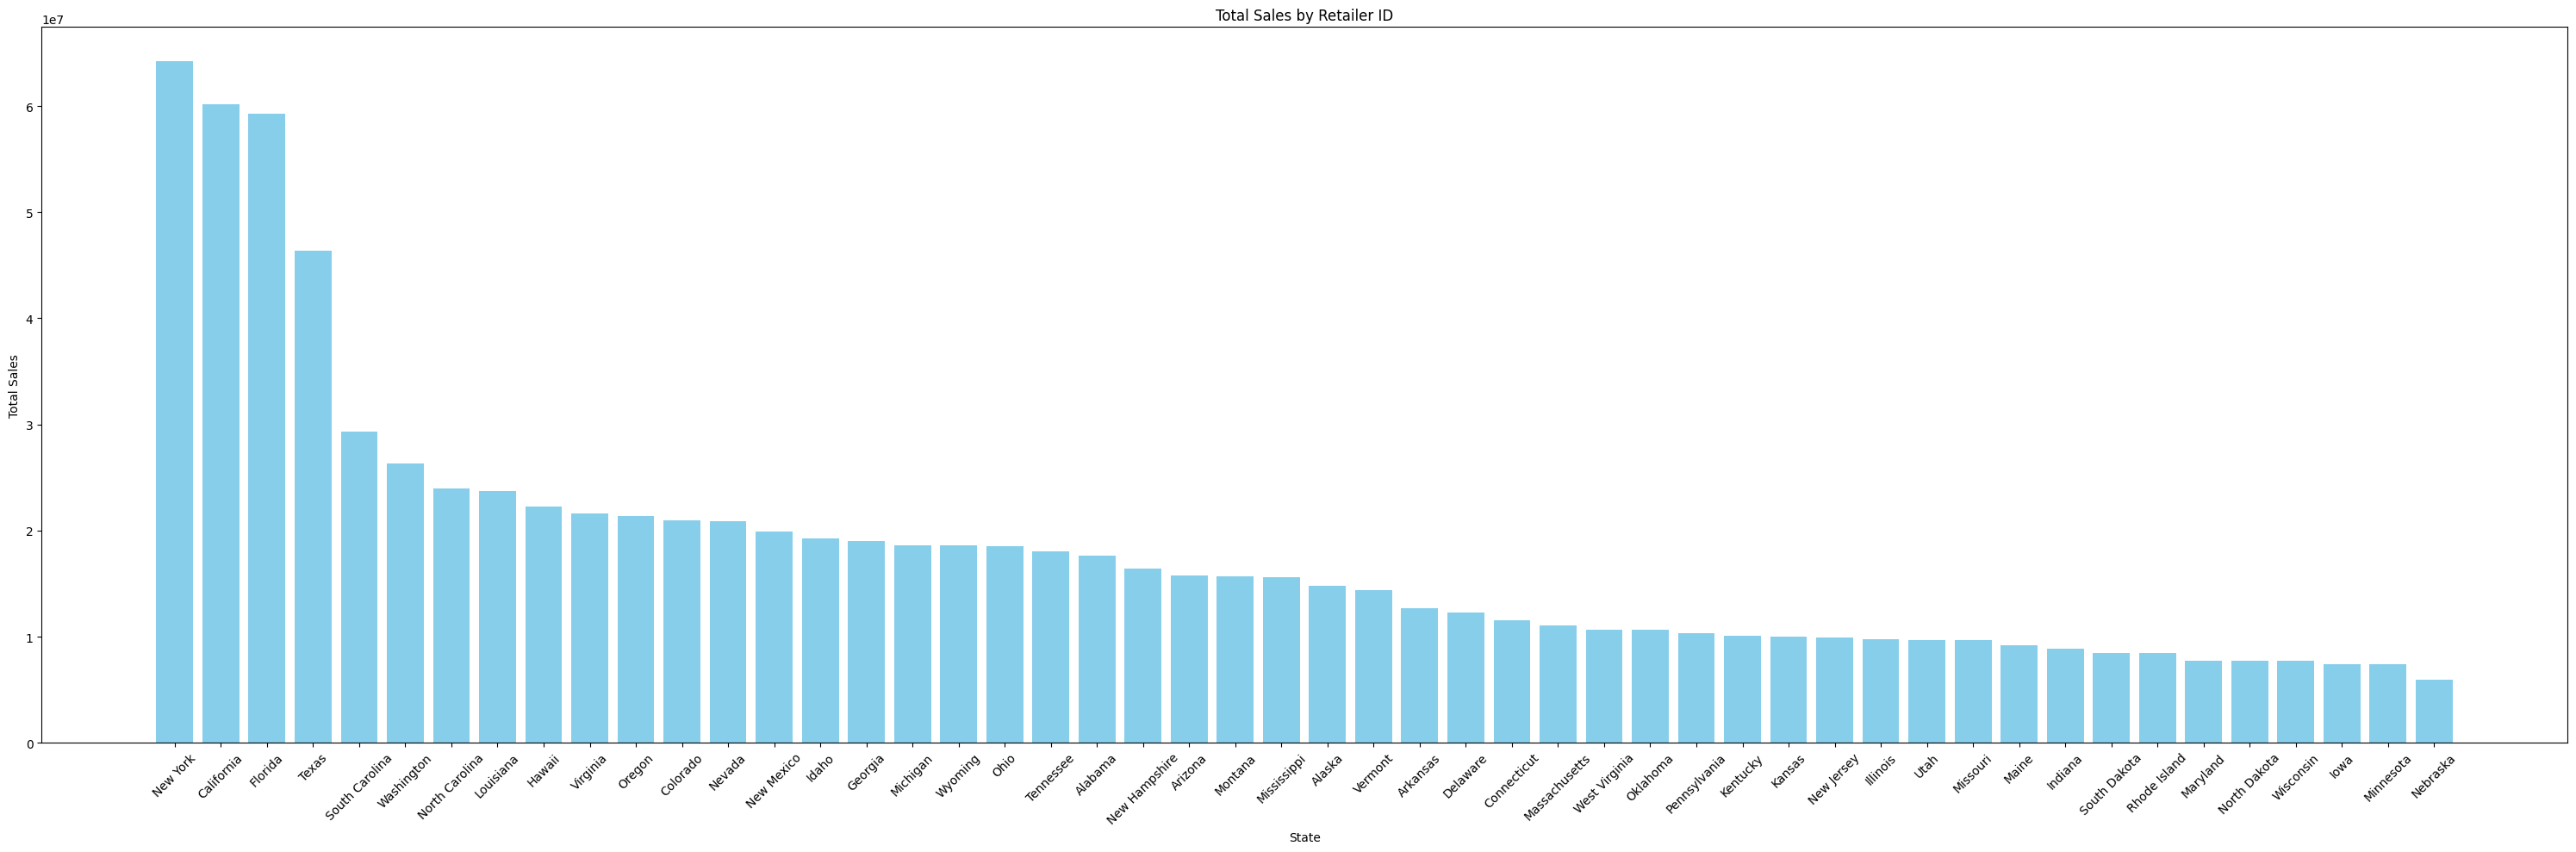

In [140]:
# Group by 'State' and sum 'Total Sales'
grouped_df = clean1_df.groupby('State')['Total Sales'].sum().reset_index()

# Sort by 'Total Sales' descending
grouped_df = grouped_df.sort_values(by='Total Sales', ascending=False)

# Plotting the bar graph
plt.figure(figsize=(30, 10))
plt.bar(grouped_df['State'].astype(str), grouped_df['Total Sales'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.title('Total Sales by Retailer ID')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

In [141]:
print(clean1_df.columns.tolist())

['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City', 'Product', 'Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin', 'Sales Method']


In [142]:
clean1_df.set_index('Invoice Date', inplace=True)

clean1_df.index = pd.to_datetime(clean1_df.index)

monthly_sales = clean1_df['Total Sales'].resample('M').sum()
print("Monthly Sales:")
print(monthly_sales,"\n")

Monthly Sales:
Invoice Date
2020-01-31    16253746.0
2020-02-29    14997988.0
2020-03-31    17660577.0
2020-04-30    24607006.0
2020-05-31    16918014.0
2020-06-30     8829819.0
2020-07-31    17146013.0
2020-08-31    19877980.0
2020-09-30    18304436.0
2020-10-31    10836269.0
2020-11-30     8622300.0
2020-12-31     8026527.0
2021-01-31    55225396.0
2021-02-28    46102165.0
2021-03-31    39148532.0
2021-04-30    47732964.0
2021-05-31    63589681.0
2021-06-30    65917553.0
2021-07-31    78334681.0
2021-08-31    72288221.0
2021-09-30    59357023.0
2021-10-31    53074764.0
2021-11-30    59235040.0
2021-12-31    77815430.0
Freq: ME, Name: Total Sales, dtype: float64 



C:\Users\mrthb\AppData\Local\Temp\ipykernel_3892\2546315690.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = clean1_df['Total Sales'].resample('M').sum()


In [170]:
# Resample the data by year and sum the sales
yearly_sales = clean1_df['Total Sales'].resample('Y').sum()
print("\nYearly Sales:")
print(yearly_sales,"\n")


Yearly Sales:
Invoice Date
2020-12-31    182080675.0
2021-12-31    717821450.0
Freq: YE-DEC, Name: Total Sales, dtype: float64 



C:\Users\mrthb\AppData\Local\Temp\ipykernel_3892\114915283.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_sales = clean1_df['Total Sales'].resample('Y').sum()


c:\Users\mrthb\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\mrthb\AppData\Local\Temp\ipykernel_3892\755331415.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecasted_values = pd.Series(forecasted_values, index=pd.date_range('2022-01-31', periods=12, freq='M'))


Monthly Forecasted Sales:
2022-01-31    89959343.48
2022-02-28    85990452.79
2022-03-31    83231807.84
2022-04-30    85525086.29
2022-05-31     90332089.6
2022-06-30    91040709.22
2022-07-31    94766032.12
2022-08-31    92856966.56
2022-09-30    88867941.01
2022-10-31    86985287.74
2022-11-30    88902735.95
2022-12-31    94642225.97
Freq: ME, Name: predicted_mean, dtype: object
Total Forecasted Sales for the Next Year: 1073100678.6 million


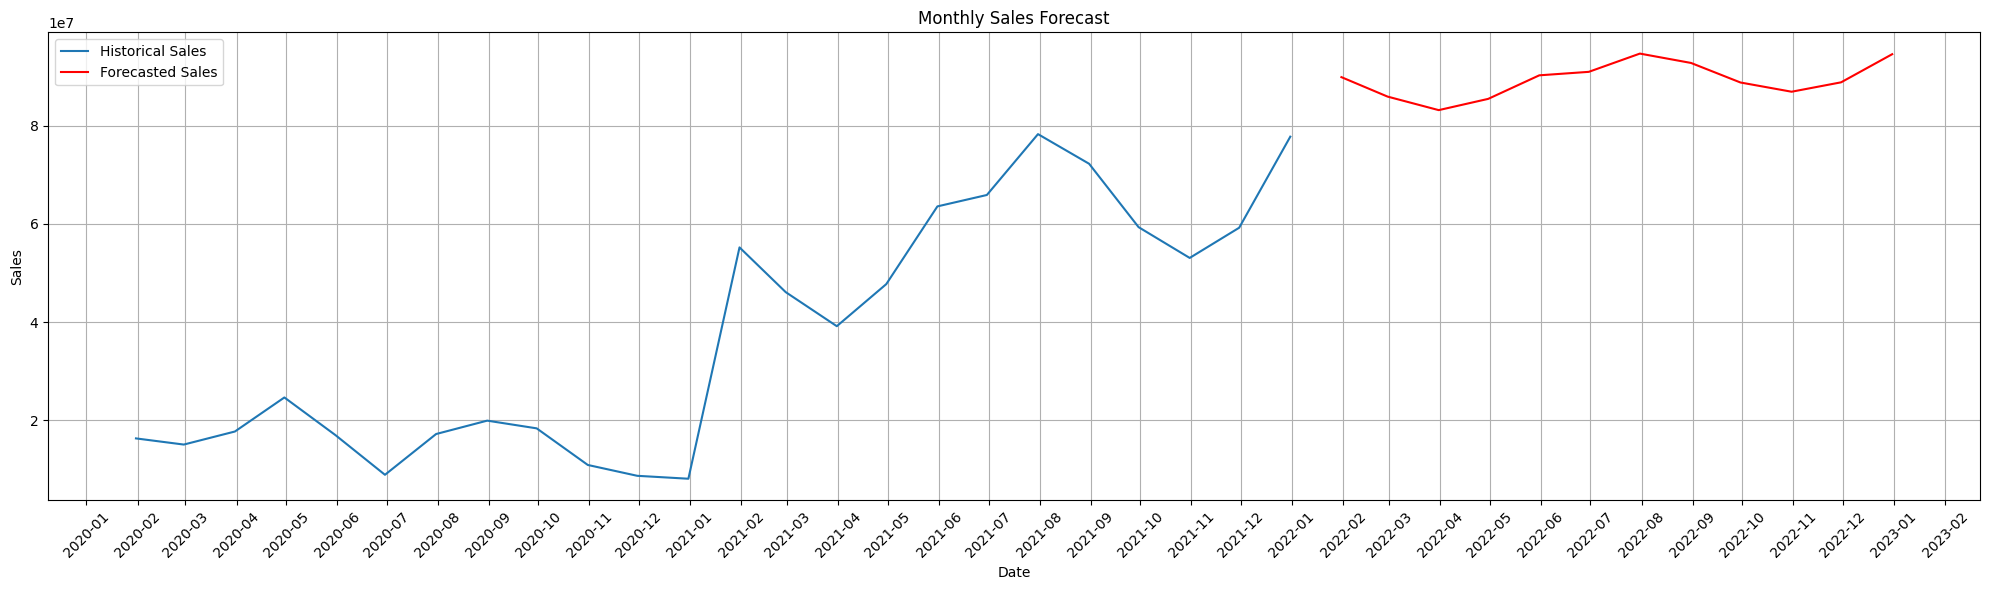

In [129]:
# Specify the ARIMA model parameters
p = 1  # Autoregressive order
d = 1  # Non-seasonal differencing
q = 1  # Moving average order
P = 1  # Seasonal autoregressive order
D = 0  # Seasonal differencing
Q = 1  # Seasonal moving average order
m = 12  # Seasonal period (for monthly data)

# Fit the SARIMAX model
model = SARIMAX(monthly_sales, order=(p, d, q), seasonal_order=(P, D, Q, m))
model_fit = model.fit(disp=False)

# Forecast the next 12 months
forecast_steps = 12
forecast = model_fit.get_forecast(steps=forecast_steps)
forecasted_values = forecast.predicted_mean

# Convert forecasted values to a pandas Series with datetime index
forecasted_values = pd.Series(forecasted_values, index=pd.date_range('2022-01-31', periods=12, freq='M'))

# Format forecasted values for Excel-like output
formatted_forecast = forecasted_values.round(2).astype(str)

print("Monthly Forecasted Sales:")
print(formatted_forecast)

# Calculate the total forecasted sales for the next year in millions
total_forecasted_sales_next_year = forecasted_values.sum()
print(f"Total Forecasted Sales for the Next Year: {total_forecasted_sales_next_year:.1f} million")

# Visualize the forecast
plt.figure(figsize=(20, 6))
plt.plot(monthly_sales.index, monthly_sales, label='Historical Sales')
plt.plot(forecasted_values.index, forecasted_values, label='Forecasted Sales', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Monthly Sales Forecast')
plt.legend()

# Set x-axis major locator and formatter
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\mrthb\AppData\Local\Temp\ipykernel_3892\150676389.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y = np.array(monthly_sales.shift(-1).fillna(method='ffill')).reshape(-1, 1)
c:\Users\mrthb\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
Forecasted Sales for 2022:
[550339.6  459423.6  390128.34 475675.22 633692.6  656890.9  780631.9
 720376.4  591512.75 528908.1  590297.4  775457.1 ]


C:\Users\mrthb\AppData\Local\Temp\ipykernel_3892\150676389.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range('2022-01-31', periods=12, freq='M'), forecast.flatten(), label='Forecasted Sales', color='red')


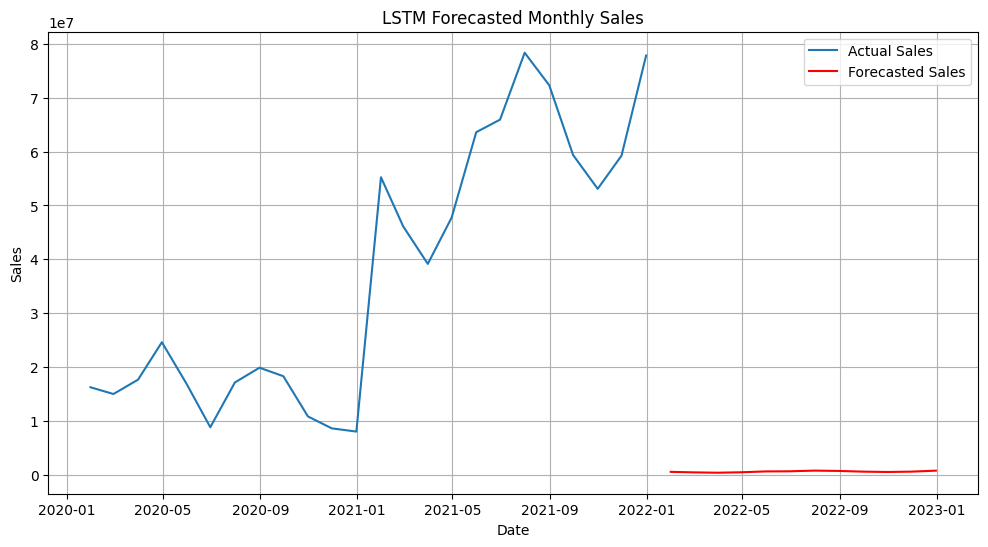

In [130]:
# Prepare data for LSTM (reshape data for LSTM input)
X = np.array(monthly_sales).reshape(-1, 1)
y = np.array(monthly_sales.shift(-1).fillna(method='ffill')).reshape(-1, 1)

# Define LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Fit the model
model.fit(X[:-12], y[:-12], epochs=100, verbose=0)  # Training on data up to December 2021

# Forecast the next 12 months starting from January 2022
forecast_input = np.array(monthly_sales[-12:]).reshape(-1, 1)  # Last 12 months as input
forecast = model.predict(forecast_input)

# Print the forecasted values
print("Forecasted Sales for 2022:")
print(forecast.flatten())  # Print forecasted values as a flattened array

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales, label='Actual Sales')
plt.plot(pd.date_range('2022-01-31', periods=12, freq='M'), forecast.flatten(), label='Forecasted Sales', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('LSTM Forecasted Monthly Sales')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\mrthb\AppData\Local\Temp\ipykernel_3892\1401412342.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(forecast_start_date, forecast_end_date, freq='M')
C:\Users\mrthb\AppData\Local\Temp\ipykernel_3892\1401412342.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecasted_sales[month] = moving_average_forecast[-1]


Forecasted Sales for 2022:
2022-01-31    5.981845e+07
2022-02-28    6.023600e+07
2022-03-31    6.023600e+07
2022-04-30    6.023600e+07
2022-05-31    6.023600e+07
2022-06-30    6.023600e+07
2022-07-31    6.023600e+07
2022-08-31    6.023600e+07
2022-09-30    6.023600e+07
2022-10-31    6.023600e+07
2022-11-30    6.023600e+07
2022-12-31    6.023600e+07
Freq: ME, dtype: float64



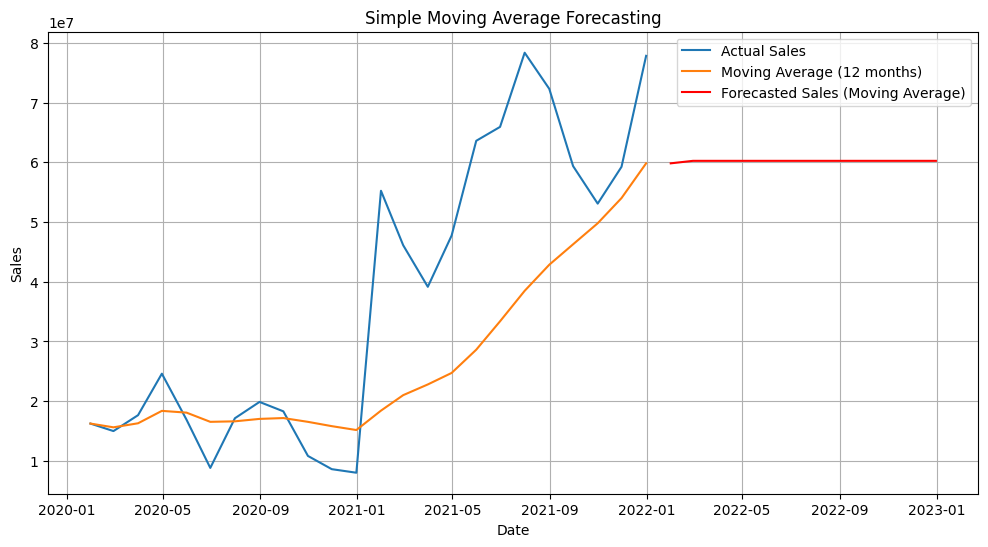

In [161]:
# Calculate Moving Average forecast
window_size = 12  # 12 months moving average
moving_average_forecast = monthly_sales.rolling(window=window_size, min_periods=1).mean()

# Extend the forecast into 2022
forecast_start_date = pd.Timestamp('2022-01-31')
forecast_end_date = forecast_start_date + pd.DateOffset(months=11)  # Forecasting 12 months ahead
forecast_index = pd.date_range(forecast_start_date, forecast_end_date, freq='M')

# Calculate moving average for each month in 2022
forecasted_sales = pd.Series(index=forecast_index)
for month in forecast_index:
    if month.month == 1:  # If it's January, use the last available moving average value
        forecasted_sales[month] = moving_average_forecast[-1]
    else:
        # Calculate the moving average for this month dynamically
        start_index = max(0, len(monthly_sales) - (window_size - 1))
        forecasted_sales[month] = monthly_sales[start_index:].mean()

# Print the forecasted sales for 2022
print("Forecasted Sales for 2022:")
print(forecasted_sales)
print()

# Plotting results
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales, label='Actual Sales')
plt.plot(moving_average_forecast.index, moving_average_forecast, label=f'Moving Average ({window_size} months)')
plt.plot(forecasted_sales.index, forecasted_sales, label='Forecasted Sales (Moving Average)', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Simple Moving Average Forecasting')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\mrthb\AppData\Local\Temp\ipykernel_3892\655287529.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range('2022-01-31', periods=12, freq='M'), forecast_naive, label='Forecasted Sales (Naive Method)', color='green')


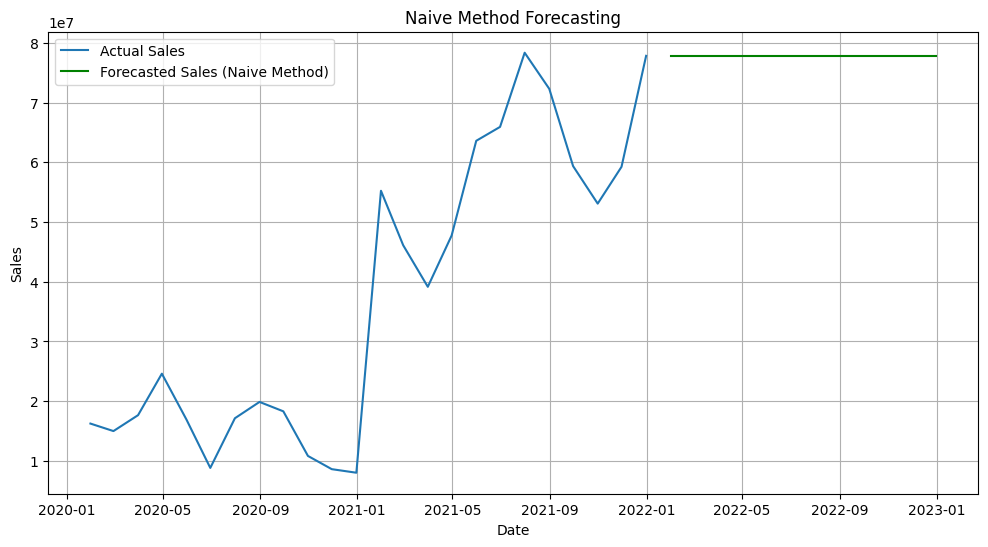

In [146]:
# Naive Method
last_observation = monthly_sales.iloc[-1]
forecast_naive = [last_observation] * 12  # Forecasting the next 12 months based on the last observed value

# Plotting results
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales, label='Actual Sales')
plt.plot(pd.date_range('2022-01-31', periods=12, freq='M'), forecast_naive, label='Forecasted Sales (Naive Method)', color='green')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Naive Method Forecasting')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\mrthb\AppData\Local\Temp\ipykernel_3892\1218159117.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range('2022-01-31', periods=12, freq='M'), forecast_seasonal_naive, label='Forecasted Sales (Seasonal Naive)', color='purple')


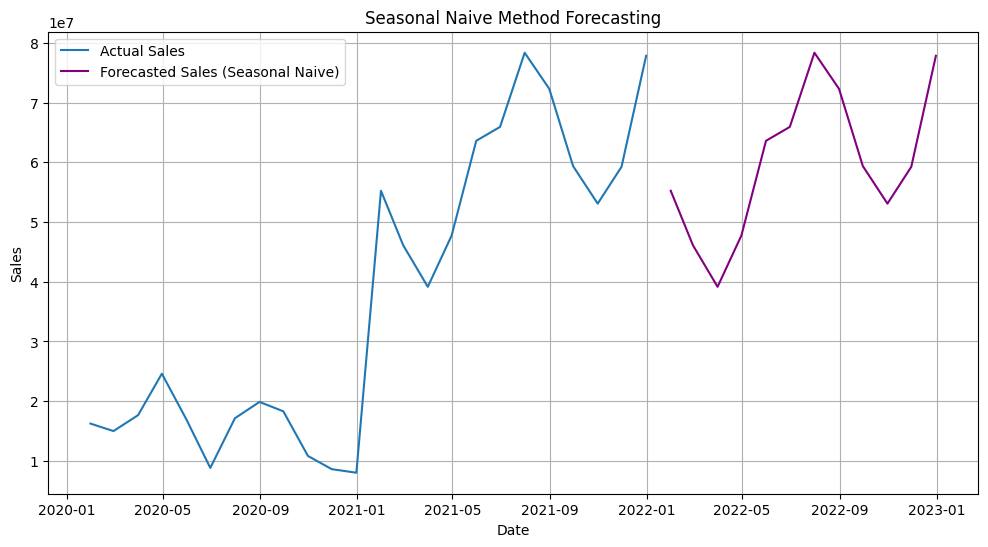

In [145]:
# Seasonal Naive Method
seasonal_last_year = monthly_sales.groupby(monthly_sales.index.month).last()
forecast_seasonal_naive = [seasonal_last_year[month] for month in range(1, 13)]

# Plotting results
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales, label='Actual Sales')
plt.plot(pd.date_range('2022-01-31', periods=12, freq='M'), forecast_seasonal_naive, label='Forecasted Sales (Seasonal Naive)', color='purple')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Seasonal Naive Method Forecasting')
plt.legend()
plt.grid(True)
plt.show()
